<Figure size 640x480 with 0 Axes>

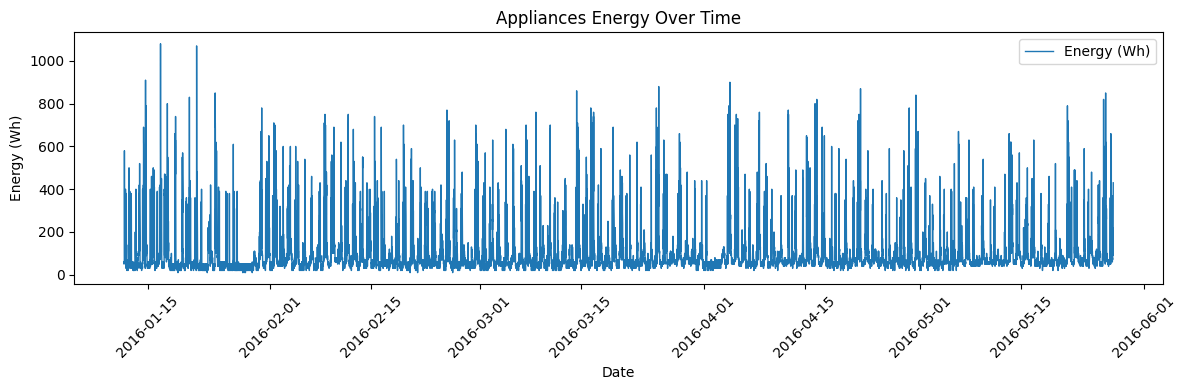

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data and ensure date is parsed correctly
df = pd.read_csv('../data/processed_data.csv')
df['date'] = pd.to_datetime(df['date'])

# Clear any existing plots
plt.clf()

# Create new figure
plt.figure(figsize=(12, 4))

plt.plot(df['date'], df['Appliances'], label='Energy (Wh)', linewidth=1)
plt.legend()
plt.title('Appliances Energy Over Time')
plt.xlabel('Date')
plt.ylabel('Energy (Wh)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



FileNotFoundError: [Errno 2] No such file or directory: '/home/yasso/Documents/MAIM/Modules/PFE/IoT/notebooks/images/anomalies_ml.png'

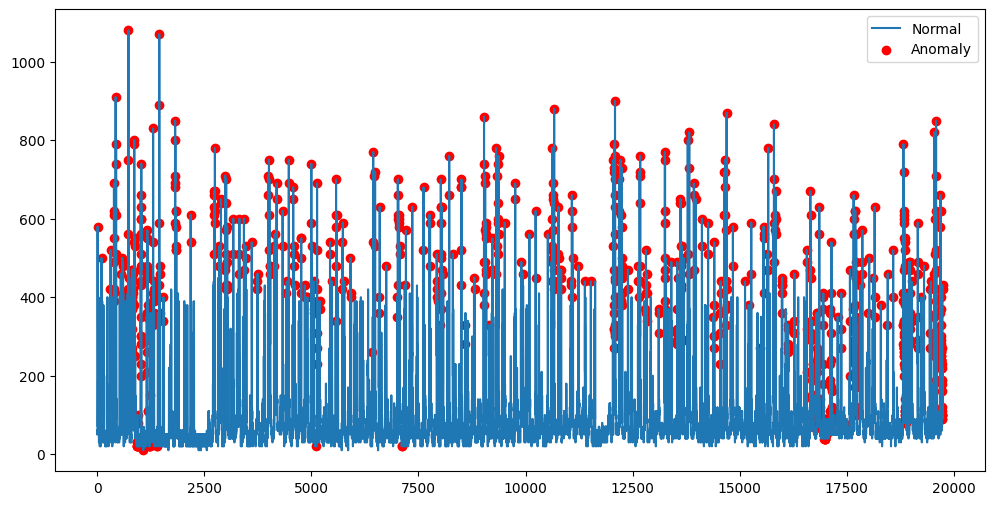

In [7]:
# Model Training & Prediction
from sklearn.ensemble import IsolationForest

model = IsolationForest(contamination=0.05, random_state=42)
df['anomaly'] = model.fit_predict(df[['Appliances', 'T_out']])  # Use 2+ features!

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Appliances'], label='Normal')
plt.scatter(df.index[df['anomaly'] == -1], df['Appliances'][df['anomaly'] == -1], color='red', label='Anomaly')
plt.legend()
plt.savefig('images/anomalies_ml.png')  # Save for README

In [22]:
# Calculate the percentage of anomalies
anomaly_percent = (df['anomaly'] == -1).mean() * 100
print(f"Anomalies detected: {anomaly_percent:.2f}%")

Anomalies detected: 5.00%


<Axes: title={'center': 'Residuals After Decomposition'}>

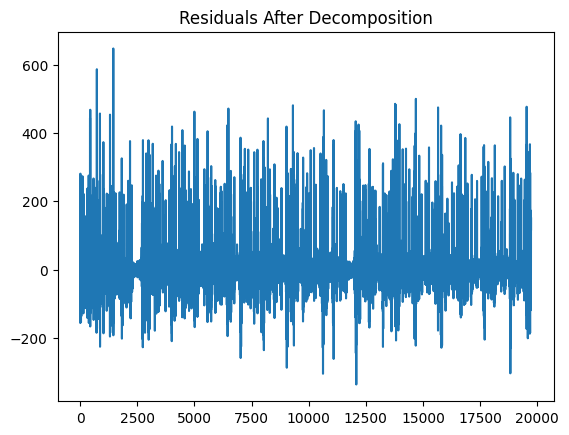

In [23]:
from statsmodels.tsa.seasonal import STL

# df.index = pd.DatetimeIndex(df.index)
# stl = STL(df['Appliances'], seasonal=13)
stl = STL(df['Appliances'], period=13, seasonal=13)

res = stl.fit()
df['residual'] = res.resid
df['residual'].plot(title='Residuals After Decomposition')